

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Homeless with GIF Video





Import Libraries & get url


In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Get yesterday variable in bash and format it for url

In [126]:
#date format 'year-mm-dd'
# date -d "2 weeks ago"

yesterday = !date -d "yesterday 13:00 " '+%Y-%m-%d'

twoDaysAgo = !date -d "2 days ago 13:00 " '+%Y-%m-%d'
oneWeekAgo = !date -d "1 week ago 13:00 " '+%Y-%m-%d'

beginDate = twoDaysAgo
print(yesterday, twoDaysAgo, oneWeekAgo)
print(beginDate)
startdate = str(beginDate)[1:-1]
print(startdate)


#hard code option
#startdate = "'2016-12-09'"

['2017-01-01'] ['2016-12-31'] ['2016-12-26']
['2016-12-31']
'2016-12-31'


## get url

edit code here to combine both types of URL, encampments and concerns

In [127]:
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv' // homeless
url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'
#url = 'https://data.sfgov.org/resource/rme2-xgvs.csv'// graffiti
modify= "?$where=opened"
operator = '>='
#date format 'year-mm-dd'


url = url + modify + operator + str(startdate)
print(url)


https://data.sfgov.org/resource/gbya-e2d3.csv?$where=opened>='2016-12-31'


In [128]:
#df1 = pd.read_csv(url)
#df2 = pd.read_csv(url2)
#df =  pd.concat([df1,df2])

## Set Display Column with wider so no problem with Media URL series

In [129]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [130]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



## create data frame

In [131]:
df = pd.read_csv(url)

In [132]:
df.shape

(37, 16)

#### wow, 5 days > 1000 reports

In [133]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6679534,12/31/2016 10:35:39 PM,NaN,12/31/2016 10:35:39 PM,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"450 MCALLISTER ST, SAN FRANCISCO, CA, 94102",6,Civic Center,"(37.780325326821, -122.419331515171)",Open311,NaN
1,6679321,12/31/2016 08:04:50 PM,NaN,12/31/2016 08:37:40 PM,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"44 5TH ST, SAN FRANCISCO, CA, 94103",6,South of Market,"(37.783268436738, -122.407462124927)",Voice In,NaN
2,6679319,12/31/2016 08:04:39 PM,12/31/2016 08:27:06 PM,12/31/2016 08:27:06 PM,Closed,Case is Invalid -,311 Supervisor Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of LISBON ST and RUSSIA AVE,11,Excelsior,"(37.7204448592181, -122.434784793444)",Open311,NaN


In [91]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [92]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6679534,2016-12-31 22:35:39,NaT,2016-12-31 22:35:39,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"450 MCALLISTER ST, SAN FRANCISCO, CA, 94102",6,Civic Center,"(37.780325326821, -122.419331515171)",Open311,NaN
1,6679321,2016-12-31 20:04:50,NaT,2016-12-31 20:37:40,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"44 5TH ST, SAN FRANCISCO, CA, 94103",6,South of Market,"(37.783268436738, -122.407462124927)",Voice In,NaN
2,6679319,2016-12-31 20:04:39,2016-12-31 20:27:06,2016-12-31 20:27:06,Closed,Case is Invalid -,311 Supervisor Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of LISBON ST and RUSSIA AVE,11,Excelsior,"(37.7204448592181, -122.434784793444)",Open311,NaN


/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=31.0, right=31.0
  'left=%s, right=%s') % (left, right))


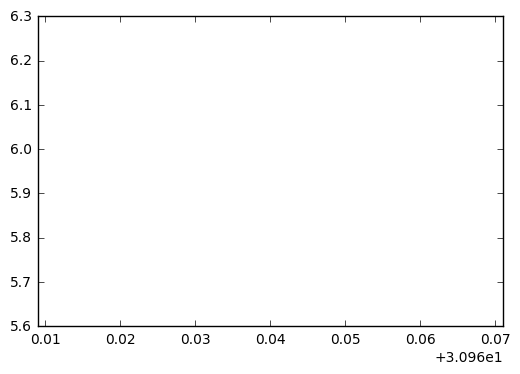

In [93]:
df.Closed.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=31.0, right=31.0
  'left=%s, right=%s') % (left, right))


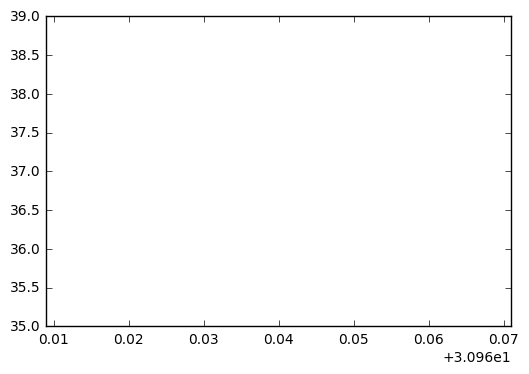

In [94]:
df.Opened.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=5.0, right=5.0
  'left=%s, right=%s') % (left, right))


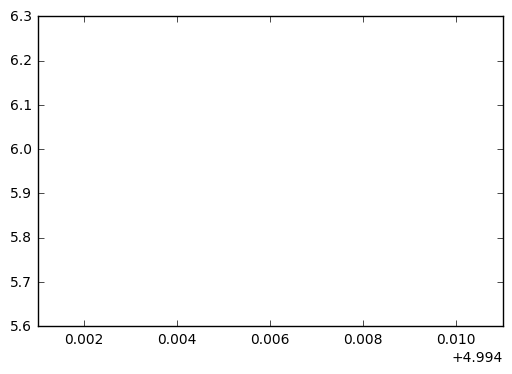

In [95]:
df.Closed.dt.weekday.value_counts().sort_index().plot()

In [96]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [97]:

df['Request Details'].value_counts()


Encampment Cleanup    37
Name: Request Details, dtype: int64

In [98]:
df['Supervisor District'].value_counts().sort_index()



1      1
3      1
5      1
6     14
8      8
9     10
10     1
11     1
Name: Supervisor District, dtype: int64

In [99]:
df.Neighborhood.value_counts()

Mission                    9
South of Market            8
Civic Center               3
Castro                     3
Duboce Triangle            2
Mission Dolores            2
Excelsior                  1
Outer Richmond             1
Showplace Square           1
Dogpatch                   1
Bernal Heights             1
Tenderloin                 1
Downtown / Union Square    1
Corona Heights             1
Rincon Hill                1
Hayes Valley               1
Name: Neighborhood, dtype: int64


### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [100]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']



## limit the data frame to just one neighborhood or just one supervisor district

# Mission

In [101]:
dfm= df[df.Neighborhood == 'Mission']
dfm = dfm[dfm['Media URL'].notnull()]['Media URL']
dfm = dfm.reset_index(drop=True)
dfm.to_csv('mission.txt', index=False)
dfm

0                   http://mobile311.sfgov.org/media/san_francisco/report/photos/58687c293da1350696e75f63/report.jpg
1    http://mobile311.sfgov.org/media/san_francisco/report/photos/586807873da1350696e753b5/photo_20161231_113116.jpg
2                   http://mobile311.sfgov.org/media/san_francisco/report/photos/5867ffa83da1350696e7530a/report.jpg
3    http://mobile311.sfgov.org/media/san_francisco/report/photos/5867fe5c3da1350696e752ff/photo_20161231_105145.jpg
4    http://mobile311.sfgov.org/media/san_francisco/report/photos/5867fdab3da1350696e752f5/photo_20161231_104807.jpg
5    http://mobile311.sfgov.org/media/san_francisco/report/photos/5867fd213da1350696e752e0/photo_20161231_104655.jpg
6    http://mobile311.sfgov.org/media/san_francisco/report/photos/5867fcda3da1350696e752d6/photo_20161231_104544.jpg
7    http://mobile311.sfgov.org/media/san_francisco/report/photos/5867f2753da1350696e75183/photo_20161231_095932.jpg
Name: Media URL, dtype: object

In [102]:
print(dfm[0])

http://mobile311.sfgov.org/media/san_francisco/report/photos/58687c293da1350696e75f63/report.jpg


# Soma


In [103]:
dfs= df[df.Neighborhood == 'South of Market']
dfs = dfs[dfs['Media URL'].notnull()]['Media URL']
dfs = dfs.reset_index(drop=True)
dfs.to_csv('soma.txt', index=False)
print(dfs[0])
dfs

http://mobile311.sfgov.org/media/san_francisco/report/photos/586853b23da1350696e75b7a/photo_20161231_165512.jpg


0    http://mobile311.sfgov.org/media/san_francisco/report/photos/586853b23da1350696e75b7a/photo_20161231_165512.jpg
1    http://mobile311.sfgov.org/media/san_francisco/report/photos/58680db43da1350696e75430/photo_20161231_115701.jpg
Name: Media URL, dtype: object

# Supervisor District

## District 9, Hilary Ronan

In [104]:

dfr = df[df['Supervisor District']==9]
dfr = dfr[dfr['Media URL'].notnull()]['Media URL']
dfr = dfr.reset_index(drop=True)
dfr.to_csv('ronan.txt',index=False)


In [105]:
!cat ronan.txt

http://mobile311.sfgov.org/media/san_francisco/report/photos/58687c293da1350696e75f63/report.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/586842a43da1350696e759b0/report.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/586807873da1350696e753b5/photo_20161231_113116.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/5867ffa83da1350696e7530a/report.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/5867fe5c3da1350696e752ff/photo_20161231_105145.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/5867fdab3da1350696e752f5/photo_20161231_104807.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/5867fd213da1350696e752e0/photo_20161231_104655.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/5867fcda3da1350696e752d6/photo_20161231_104544.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/5867f2753da1350696e75183/photo_20161231_095932.jpg


## District 6, Jane Kim

In [106]:
dfk = df[df['Supervisor District']==6]
dfk = dfk[dfk['Media URL'].notnull()]['Media URL']
dfk = dfk.reset_index(drop=True)
dfk.to_csv('kim.txt',index=False)

In [107]:
!cat kim.txt

http://mobile311.sfgov.org/media/san_francisco/report/photos/586853b23da1350696e75b7a/photo_20161231_165512.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/58684feb3da1350696e75af7/report.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/58681c853da1350696e7562a/photo_20161231_125927.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/58680db43da1350696e75430/photo_20161231_115701.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/5867da1b3da1350696e74ff9/photo_20161231_081516.jpg


# The whole City

In [108]:

images = df[df['Media URL'].notnull() ]['Media URL']
images = images.reset_index(drop=True)
print(images[:])


0                    http://mobile311.sfgov.org/media/san_francisco/report/photos/58687c293da1350696e75f63/report.jpg
1     http://mobile311.sfgov.org/media/san_francisco/report/photos/586853b23da1350696e75b7a/photo_20161231_165512.jpg
2                    http://mobile311.sfgov.org/media/san_francisco/report/photos/58684feb3da1350696e75af7/report.jpg
3                    http://mobile311.sfgov.org/media/san_francisco/report/photos/586844ca3da1350696e759d5/report.jpg
4                    http://mobile311.sfgov.org/media/san_francisco/report/photos/586842a43da1350696e759b0/report.jpg
5                    http://mobile311.sfgov.org/media/san_francisco/report/photos/58683ab83da1350696e7590b/report.jpg
6     http://mobile311.sfgov.org/media/san_francisco/report/photos/58681c853da1350696e7562a/photo_20161231_125927.jpg
7     http://mobile311.sfgov.org/media/san_francisco/report/photos/58681bda3da1350696e7560f/photo_20161231_125713.jpg
8     http://mobile311.sfgov.org/media/san_francisco/rep

In [109]:
len(images)

22

In [110]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/58687c293da1350696e75f63/report.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/58684feb3da1350696e75af7/report.jpg


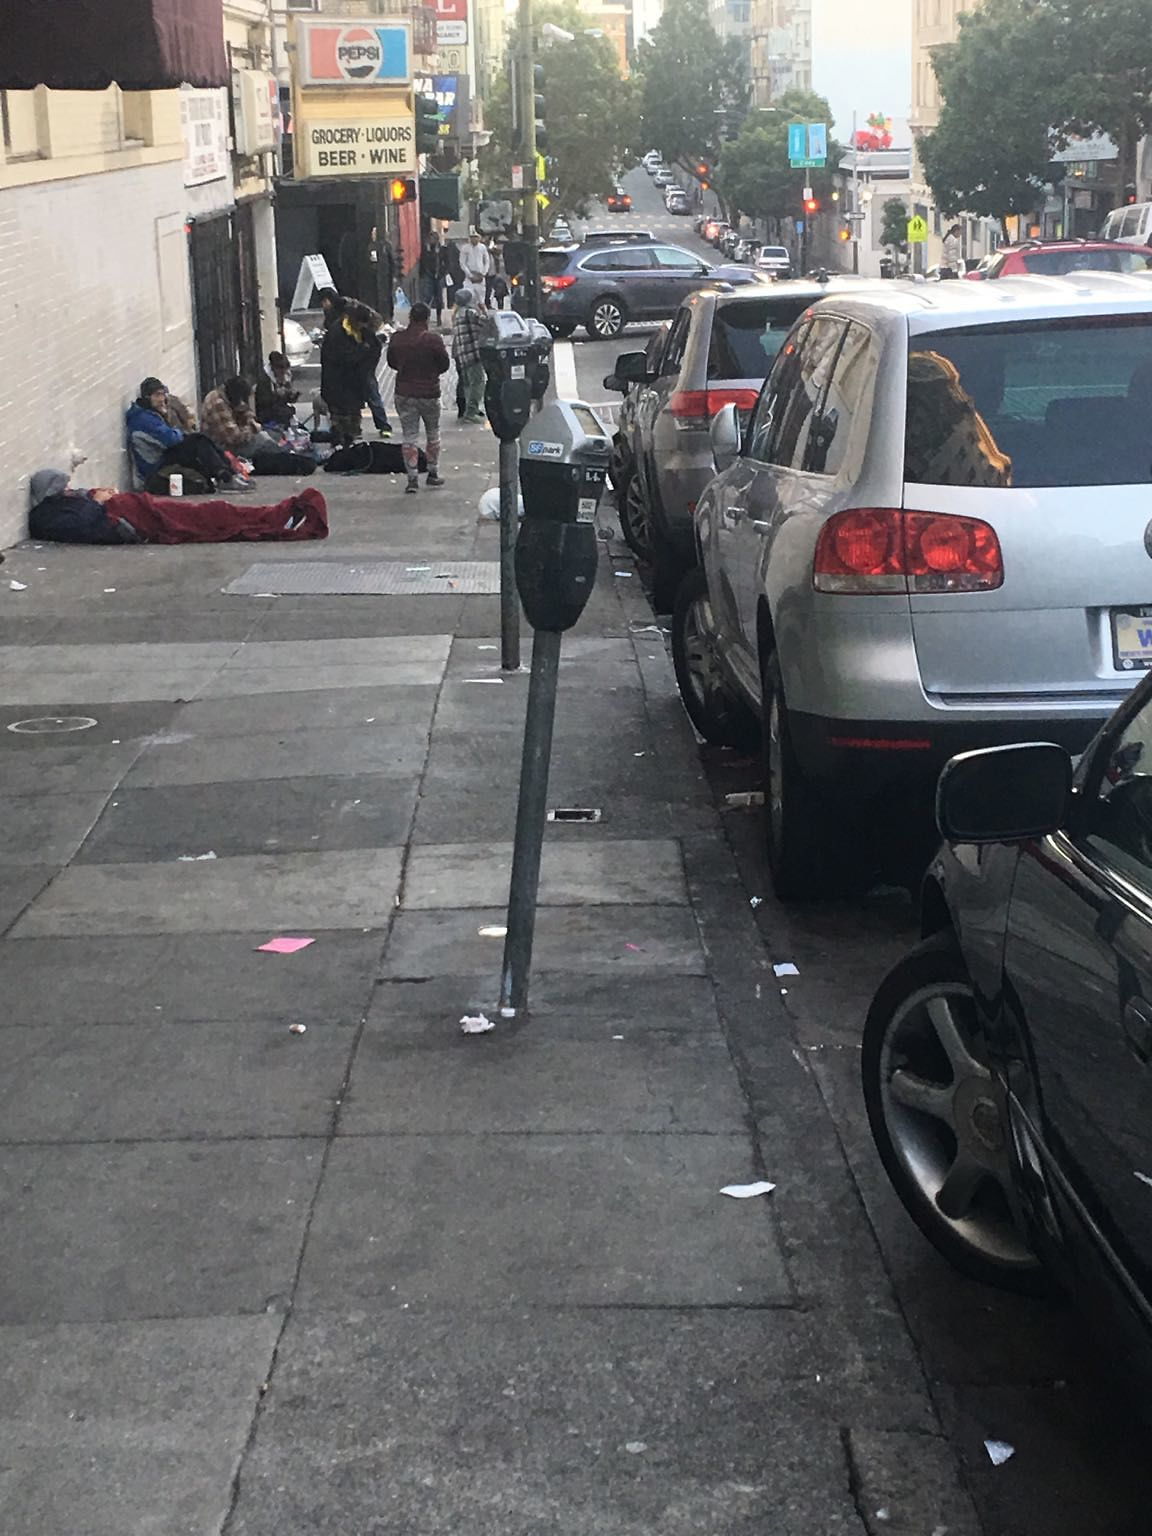

In [111]:
print(images[2])
Image(images[2])


In [112]:
!pwd

/home/gdillon/JupyterPractice/homeless_SF311


In [113]:
images[:1000].to_csv("./imagelist.txt", index=False)

In [114]:
!yes| bash vidCreate.sh 

--2017-01-01 14:31:36--  http://mobile311.sfgov.org/media/san_francisco/report/photos/58687c293da1350696e75f63/report.jpg
Resolving mobile311.sfgov.org (mobile311.sfgov.org)... 54.144.250.241
Connecting to mobile311.sfgov.org (mobile311.sfgov.org)|54.144.250.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 265370 (259K) [image/jpeg]
Saving to: 'report.jpg'

report.jpg          100%[===================>] 259.15K  1.04MB/s    in 0.2s    

2017-01-01 14:31:37 (1.04 MB/s) - 'report.jpg' saved [265370/265370]

--2017-01-01 14:31:37--  http://mobile311.sfgov.org/media/san_francisco/report/photos/586853b23da1350696e75b7a/photo_20161231_165512.jpg
Reusing existing connection to mobile311.sfgov.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 151344 (148K) [image/jpeg]
Saving to: 'photo_20161231_165512.jpg'

photo_20161231_1655 100%[===================>] 147.80K  --.-KB/s    in 0.04s   

2017-01-01 14:31:37 (3.59 MB/s) - 'photo_20161231_165512.jpg' save

In [115]:
!ls -la


total 39996
drwxrwxr-x 4 gdillon gdillon     4096 Jan  1 14:31 .
drwxrwxr-x 9 gdillon gdillon     4096 Dec 20 12:02 ..
drwxrwxr-x 2 gdillon gdillon     4096 Dec 21 21:50 .ipynb_checkpoints
-rw-rw-r-- 1 gdillon gdillon    19266 Dec 20 12:02 ImportTablefromWikipedia.ipynb
-rw-rw-r-- 1 gdillon gdillon   203754 Dec 20 12:02 SF311 Annual .ipynb
-rw-rw-r-- 1 gdillon gdillon   276804 Dec 20 12:02 San+Fran +Graffiti pull one day.ipynb
-rw-rw-r-- 1 gdillon gdillon   562269 Dec 20 12:02 San+Francisco+Graffiti with Video.ipynb
-rw-rw-r-- 1 gdillon gdillon  2315806 Dec 30 23:15 first.gif
-rw-rw-r-- 1 gdillon gdillon  4716306 Dec 30 23:15 fourth.gif
-rw-rw-r-- 1 gdillon gdillon     1332 Dec 23 19:05 heartofCity.txt
-rw-rw-r-- 1 gdillon gdillon 12895052 Jan  1 14:31 imagelist.gif
-rw-rw-r-- 1 gdillon gdillon     2299 Jan  1 14:31 imagelist.txt
drwxrwxr-x 2 gdillon gdillon    12288 Jan  1 14:31 input
-rw-rw-r-- 1 gdillon gdillon   482272 Dec 30 14:30 kim.gif
-rw-rw-r-- 1 gdillon gdillon      545 Jan 